In [16]:
from random import random
import matplotlib.pyplot as plt

In [9]:
dist = lambda x, y : (x**2 + y**2)**0.5

In [10]:
def predict_pi(iterations):
  inside = outside = 0
  for i in range(iterations):
    point = (random(), random())
    if dist(*point) < 1:
      inside += 1
    else:
      outside += 1
  return 4*inside / (inside + outside)

In [12]:
predict_pi(10000000)

3.1420864

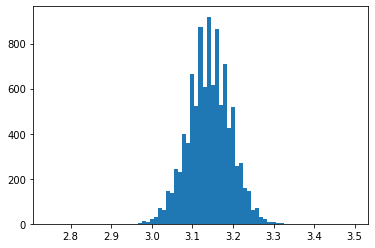

In [17]:
preds = {round((i/100)+2.75, 2):0 for i in range(75)}
for i in range(10000):
  pred = predict_pi(1000)
  preds[round(pred, 2)] += 1
plt.bar([i for i in preds], [i for i in preds.values()], width=0.01)
plt.show()

In [33]:
import numpy as np
import time

In [34]:
def render(no_samples, width=50, height=25):
  image = np.zeros((height, width))
  for y in range(height):
    for x in range(width):
      brightness = 0
      for i in range(no_samples):
        brightness += trace_path(np.array([0, 0, 1]), np.array([x, y, 0]))
      brightness /= no_samples
      image[y, x] = brightness
    if y % 10 == 0:
      print(f"{round(y*100/height)}% complete")
  return image

In [35]:
def trace_path(ray, origin, depth=0):
  max_depth = 3

  if depth >= max_depth:
    return 0

  intersection, normal, emittance = find_object(ray, origin)

  if intersection is None:
    return 0

  new_ray = get_random_ray(normal)
  ang = np.dot(new_ray, normal)
  incoming = trace_path(new_ray, intersection, depth+1)

  return emittance + incoming * ang

In [36]:
def get_random_ray(normal):
  vec = np.random.randn(3)
  vec /= np.linalg.norm(vec, axis=0)
  if np.dot(vec, normal) <= 0:
    return get_random_ray(normal)
  return vec

In [42]:
def find_object(ray, origin):
  objects = [
    { "C": np.array([50, 50, 50]), "R": 50, "I": 0 },
    { "C": np.array([100, 100, -50]), "R": 50, "I": 1 }
  ]

  distances = [sphere_intersect(obj, origin, ray) for obj in objects]
  min_distance, closest = 1000000000, None
  for i, dist in enumerate(distances):
    if dist != None and dist < min_distance:
      min_distance = dist
      closest = objects[i]

  if closest == None:
    return None, None, None

  intersection = origin + min_distance * ray
  vect = intersection - closest["C"]
  normal = vect / np.linalg.norm(vect, axis=0)

  return intersection, normal, closest["I"]

def sphere_intersect(obj, origin, ray):  # solve the quadratic (from link)
  centre, radius = obj["C"], obj["R"]
  b = 2 * np.dot(ray, origin - centre)
  c = np.linalg.norm(origin - centre) ** 2 - radius ** 2
  delta = b ** 2 - 4 * c
  if delta > 0:
    t1 = (-b + np.sqrt(delta)) / 2
    t2 = (-b - np.sqrt(delta)) / 2
    if t1 > 0 and t2 > 0:
      return min(t1, t2)
  return None

0% complete
40% complete
80% complete


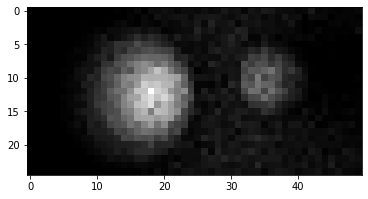

Finished in 79.0 seconds


In [39]:
start_time = time.time()
img = render(250)
plt.imshow(img, cmap="gray")
plt.show()
print(f"Finished in {round(time.time() - start_time, 1)} seconds")

In [40]:
def iterative_render(iters, width=50, height=25):
  image = np.zeros((height, width))
  for i in range(iters):
    for y in range(height):
      for x in range(width):
        image[y, x] += trace_path(np.array([0, 0, 1]), np.array([x, y, 0]))
    yield image / (i+1)

In [ ]:
for img in iterative_render(10000, width=100, height=100):
  plt.imshow(img, cmap="gray")
  plt.show()